# <font color='blue'>Predicting the occurrence of diabetes with Machine Learning</font>

In [1]:
# Python Language Version
from platform import python_version
print('Python Language Version Used In This Jupyter Notebook:', python_version())

Python Language Version Used In This Jupyter Notebook: 3.8.3


# Business Problem 

#### Predict whether a person will develop diabetes

        Define data sources
        Understand the attributes of the collected data
        Select the most appropriate analysis tools
        Define the expected result - In this case: True or False
        Set the level of accuracy: 70% accuracy
        
        
#### Problem definition: Define, with 70% accuracy or more, whether or not a person can develop diabetes.

## UCI / Kaggle Machine Learning Repository Dataset
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [2]:
# Imports
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [3]:
# loading a dataset
df = pd.read_csv("pima-data.csv")   

In [4]:
# Checking the data format
df.shape

(768, 10)

In [5]:
# View
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
# Checking for null values
df.isnull().values.any()

False

In [7]:
# Identifying the correlation between variables
# Correlation does not imply causality
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    

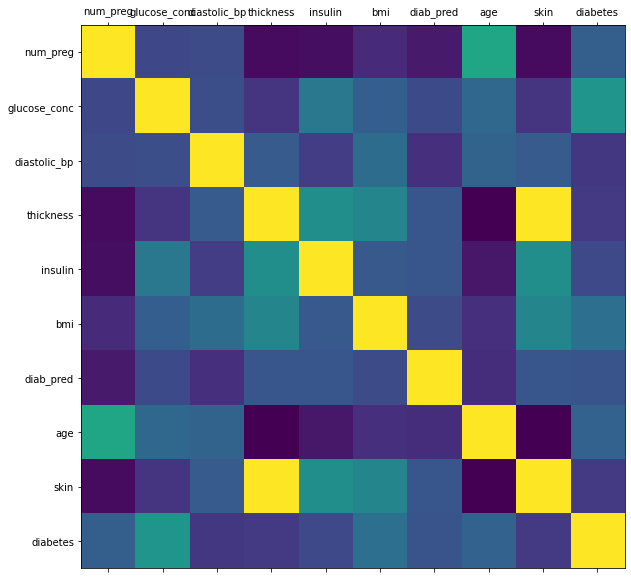

In [8]:
# Creating the chart
plot_corr(df)

In [9]:
# Viewing the correlation in a table
# Correlation coefficient:
# +1 = strong positive correlation
# 0 = no correlation
# -1 = strong negative correlation
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [17]:
# Defining the classes
diabetes_map = {True : 1, False : 0}

In [18]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [10]:
# Checking the first rows of the datase
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
# Checking how the data is distributed
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (65.10%)


## Spliting

0% for training data and 30% for test data

In [14]:
import sklearn as sk
sk.__version__

'0.23.1'

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Feature Selection
attributes = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [19]:
# Variable to be forecast
atrib_prev = ['diabetes']


In [20]:
# Creating objects
X = df[attributes].values
Y = df[atrib_prev].values

In [21]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [22]:
Y

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [23]:
# Setting the split rate
split_test_size = 0.30

In [24]:
# Creating training and test data
X_training , X_test, Y_training , Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [26]:
# Imprimindo os resultados
print("{0:0.2f}% in the training data".format((len(X_training)/len(df.index)) * 100))
print("{0:0.2f}% in the test data".format((len(X_test)/len(df.index)) * 100))

69.92% in the training data
30.08% in the test data


In [27]:
X_training

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

## Verificando o Split

In [30]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 1]), 
                                               (len(Y_training[Y_training[:] == 1])/len(Y_training) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_training[Y_training[:] == 0]), 
                                               (len(Y_training[Y_training[:] == 0])/len(Y_training) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), 
                                               (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), 
                                               (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


## Hidden Missing Values



In [31]:
# Checking for null values
df.isnull().values.any()

False

In [32]:
# In this case, the zero (0) values ​​should be considered values ​​not found

df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [33]:
print("# Dataframe rows {0}".format(len(df)))
print("# Missing lines glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Missing lines diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Missing lines thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Missing lines insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Missing lines bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Missing lines age: {0}".format(len(df.loc[df['age'] == 0])))

# Dataframe rows 768
# Missing lines glucose_conc: 5
# Missing lines diastolic_bp: 35
# Missing lines thickness: 227
# Missing lines insulin: 374
# Missing lines bmi: 11
# Missing lines age: 0


## Handling Missing Data - Impute
Replacing the values ​​equal to zero by the average of the data

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
# Create object
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_training = fill_0.fit_transform(X_training)
X_test = fill_0.fit_transform(X_test)

In [36]:
X_test

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

## Building and training the model

In [37]:
# Using a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [38]:
# Creating the predictive model
model_v1 = GaussianNB()

In [39]:
# Treinando o modelo
# Função ravel ajustara o "shape" do objeto
model_v1.fit(X_training, Y_training.ravel())

GaussianNB()

## Checking model accuracy in training data

In [43]:
from sklearn import metrics

In [44]:
nb_predict_train = model_v1.predict(X_training)

In [45]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_training, nb_predict_train)))
print()

Accuracy: 0.7542



## Checking model accuracy in test data

In [46]:
nb_predict_test = model_v1.predict(X_test)

In [48]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

Accuracy: 0.7359



## Metrics

In [51]:
#Creating a Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Optimizing the model with RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model_v2 = RandomForestClassifier(random_state = 42)
model_v2.fit(X_training, Y_training.ravel())

RandomForestClassifier(random_state=42)

In [56]:
# # Checking the test data
rf_predict_test = model_v2.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test)))
print()

Accuracy: 0.7403



In [57]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 32 119]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [62]:
# Third version of the model using Logistic Regression
model_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
model_v3.fit(X_training, Y_training.ravel())
lr_predict_test = model_v3.predict(X_test)

In [77]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels = [1, 0]))

Accuracy: 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



# Accuracy in test data

### Model using Naive Bayes algorithm = 0.7359
### Model using Random Forest algorithm = 0.7400
### Model using Logistic Regression algorithm = 0.7446

## Making Predictions with the Trained Model

In [78]:
import pickle

In [79]:
# ## Saving the template for later use
filename = 'trained_model_v3.sav'
pickle.dump(model_v3, open(filename, 'wb'))

In [80]:
X_test

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [82]:
# Loading the model and forecasting with new data sets
# (X_test, Y_test should be new data sets prepared with the proper cleaning and transformation procedure)
loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.predict(X_test[15].reshape(1, -1))
result2 = loaded_model.predict(X_test[18].reshape(1, -1))
print(result1)
print(result2)

[False]
[ True]


In [83]:
# False == 0 == not diabets
# True == 1 == diabets